In [1]:
import numpy as np

from qiskit.quantum_info import SparsePauliOp
from qiskit.synthesis import SuzukiTrotter
from qiskit.quantum_info import Statevector
from qiskit.circuit import QuantumCircuit, Qubit, Instruction, Operation, CircuitInstruction
from qiskit.circuit.library import PauliEvolutionGate
from qiskit import transpile

from circuit_knitting.cutting import partition_problem, cut_gates, cut_wires

from cutter_search_manual import *
from resource_analysis import PhysicalParameters
from automation import *

def get_hamiltonian(L, J, h, alpha=0):

    # List of Hamiltonian terms as 3-tuples containing
    # (1) the Pauli string,
    # (2) the qubit indices corresponding to the Pauli string,
    # (3) the coefficient.
    ZZ_tuples = [("ZZ", [i, i + 1], -J) for i in range(0, L - 1)]
    Z_tuples = [("Z", [i], -h * np.sin(alpha)) for i in range(0, L)]
    X_tuples = [("X", [i], -h * np.cos(alpha)) for i in range(0, L)]

    # We create the Hamiltonian as a SparsePauliOp, via the method
    # `from_sparse_list`, and multiply by the interaction term.
    hamiltonian = SparsePauliOp.from_sparse_list([*ZZ_tuples, *Z_tuples, *X_tuples], num_qubits=L)
    return hamiltonian.simplify()

In [2]:
# from azure.quantum import Workspace
# workspace = Workspace (
#    resource_id = "/subscriptions/e0d51919-2dda-4b7e-a8e7-77cc18580acb/resourceGroups/AzureQuantum/providers/Microsoft.Quantum/Workspaces/QECBenchmarking",
#    location = "uksouth"
# )

# from azure.quantum.qiskit import AzureQuantumProvider
# provider = AzureQuantumProvider(workspace)
# backend_est = provider.get_backend('microsoft.estimator')

In [3]:
# second_order_formula = SuzukiTrotter()

# L = 3
# H = get_hamiltonian(L=L, J=0.2, h=1.0, alpha=np.pi / 8)
# final_time = np.pi
# num_timesteps = 10
# dt = final_time / num_timesteps
# initial_state = Statevector.from_label("000")

# trotter_step_second_order = PauliEvolutionGate(H, dt, synthesis=second_order_formula)
# circuit = QuantumCircuit(H.num_qubits)
# for i in range(1):
#     circuit.append(trotter_step_second_order, range(H.num_qubits))
# # circuit = circuit.decompose(reps=1)
# target_basis = ['rx', 'ry', 'rz', 'h', 'cx']
# circuit = transpile(circuit,
#                        basis_gates=target_basis, 
#                        optimization_level=1) 

# # Let us print some stats
# print(
#     f"""
# Trotter step with Suzuki Trotter (2nd order)
# --------------------------------------------

#                   Depth: {circuit.depth()}
#              Gate count: {len(circuit)}
#     Nonlocal gate count: {circuit.num_nonlocal_gates()}
#          Gate breakdown: {", ".join([f"{k.upper()}: {v}" for k, v in circuit.count_ops().items()])}

# """
# )
# print(H)

# circuit.draw("mpl")

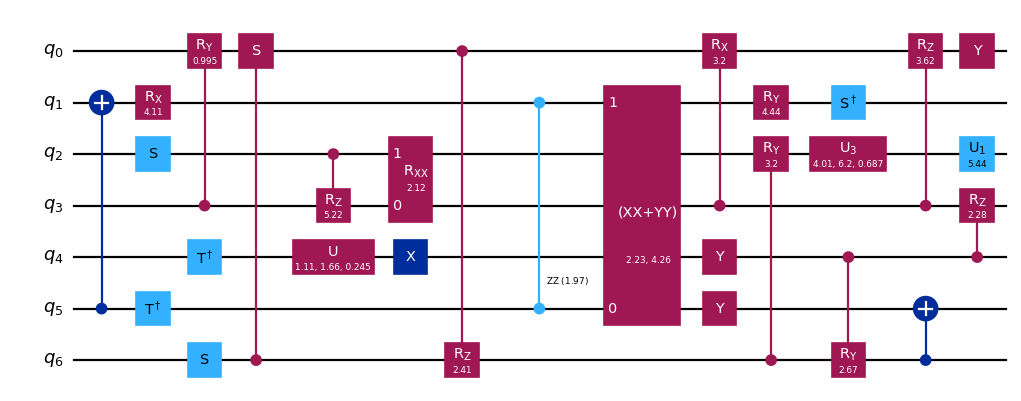

In [4]:
from qiskit.circuit.random import random_circuit
circuit = random_circuit(7, 6, max_operands=2, seed=1242)
circuit.draw('mpl', scale=0.8)

Found solution using 2 cuts with a samplingoverhead of 144.
Wire Cut at circuit instruction index 19
Gate Cut at circuit instruction index 28
cut_crz_1
cut_crz_1


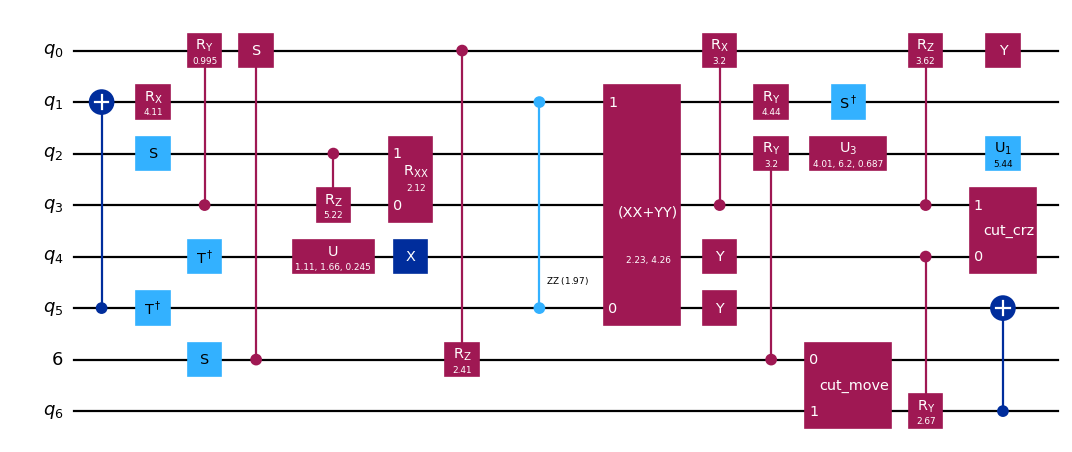

In [5]:
mix_circuit, ancilla = mix_cuts(circuit,[27],{19:[6]},gate_bell=True,wire_bell=False,ancilla=True)
ancilla.draw("mpl", scale=0.8, fold=-1)

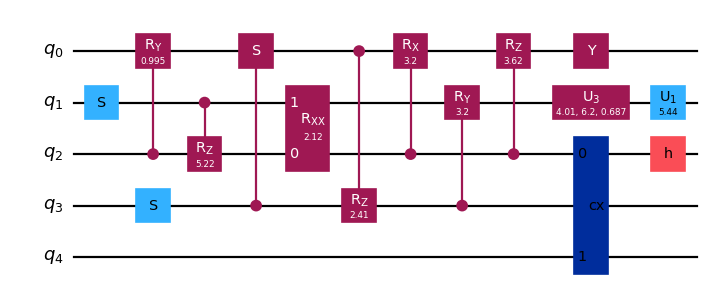

In [7]:
mix_circuit[0].draw("mpl", scale=0.8, fold=-1)

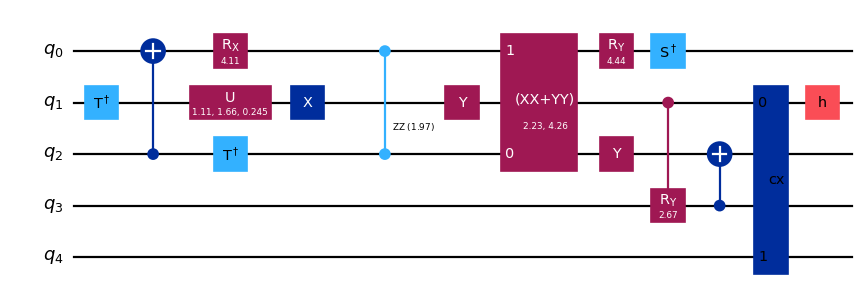

In [8]:
mix_circuit[1].draw("mpl", scale=0.8, fold=-1)